In [70]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import glob

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('../datasets/aqi/openaq_location_8415_measurments.csv')

In [3]:
df.head()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,8415,US Diplomatic Post: Dhaka,o3,0.002,ppm,2023-12-22T01:00:00Z,2023-12-22T07:00:00+06:00,Asia/Dhaka,23.796373,90.424614,NaN,NaN,NaN,Unknown Governmental Organization,StateAir Dhaka
1,8415,US Diplomatic Post: Dhaka,o3,0.002,ppm,2023-12-22T02:00:00Z,2023-12-22T08:00:00+06:00,Asia/Dhaka,23.796373,90.424614,NaN,NaN,NaN,Unknown Governmental Organization,StateAir Dhaka
2,8415,US Diplomatic Post: Dhaka,o3,0.001,ppm,2023-12-22T03:00:00Z,2023-12-22T09:00:00+06:00,Asia/Dhaka,23.796373,90.424614,NaN,NaN,NaN,Unknown Governmental Organization,StateAir Dhaka
3,8415,US Diplomatic Post: Dhaka,o3,0.001,ppm,2023-12-22T04:00:00Z,2023-12-22T10:00:00+06:00,Asia/Dhaka,23.796373,90.424614,NaN,NaN,NaN,Unknown Governmental Organization,StateAir Dhaka
4,8415,US Diplomatic Post: Dhaka,o3,0.001,ppm,2023-12-22T05:00:00Z,2023-12-22T11:00:00+06:00,Asia/Dhaka,23.796373,90.424614,NaN,NaN,NaN,Unknown Governmental Organization,StateAir Dhaka


In [4]:
df_pivot = df.pivot_table(
    index="datetimeLocal", columns="parameter", values="value", aggfunc="first"
).reset_index()

In [5]:
df_pivot.head()

parameter,datetimeLocal,o3,pm25
0,2023-12-22T07:00:00+06:00,0.002,203.0
1,2023-12-22T08:00:00+06:00,0.002,209.0
2,2023-12-22T09:00:00+06:00,0.001,185.0
3,2023-12-22T10:00:00+06:00,0.001,204.0
4,2023-12-22T11:00:00+06:00,0.001,179.0


In [75]:
combined_df = pd.concat([pd.read_csv(file) for file in glob.glob('../datasets/aqi/timeseries/*.csv')], ignore_index=True)

In [76]:
combined_df.head()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,8415,US Diplomatic Post: Dhaka,o3,0.039,ppm,2023-11-27T09:00:00Z,2023-11-27T15:00:00+06:00,Asia/Dhaka,23.796373,90.424614,NaN,NaN,NaN,Unknown Governmental Organization,StateAir Dhaka
1,8415,US Diplomatic Post: Dhaka,o3,0.047,ppm,2023-11-27T10:00:00Z,2023-11-27T16:00:00+06:00,Asia/Dhaka,23.796373,90.424614,NaN,NaN,NaN,Unknown Governmental Organization,StateAir Dhaka
2,8415,US Diplomatic Post: Dhaka,o3,0.041,ppm,2023-11-27T11:00:00Z,2023-11-27T17:00:00+06:00,Asia/Dhaka,23.796373,90.424614,NaN,NaN,NaN,Unknown Governmental Organization,StateAir Dhaka
3,8415,US Diplomatic Post: Dhaka,o3,0.021,ppm,2023-11-27T12:00:00Z,2023-11-27T18:00:00+06:00,Asia/Dhaka,23.796373,90.424614,NaN,NaN,NaN,Unknown Governmental Organization,StateAir Dhaka
4,8415,US Diplomatic Post: Dhaka,o3,0.011,ppm,2023-11-27T13:00:00Z,2023-11-27T19:00:00+06:00,Asia/Dhaka,23.796373,90.424614,NaN,NaN,NaN,Unknown Governmental Organization,StateAir Dhaka


In [77]:
df_pivot = combined_df.pivot_table(
    index="datetimeLocal", columns="parameter", values="value", aggfunc="first"
).reset_index()

In [78]:
df_pivot.rename(columns={"o3": "o3 (ppm)", "pm25": "pm2.5 (µg/m³)"}, inplace=True)


In [79]:
df_pivot.head()

parameter,datetimeLocal,o3 (ppm),pm2.5 (µg/m³)
0,2023-04-22T07:00:00+06:00,NaN,44.0
1,2023-04-23T08:00:00+06:00,NaN,77.0
2,2023-04-23T09:00:00+06:00,NaN,67.0
3,2023-04-23T10:00:00+06:00,NaN,66.0
4,2023-04-23T11:00:00+06:00,NaN,39.0


In [80]:
df_pivot.to_csv('../datasets/aqi/generated/combined_aqi_2.csv', index=False, header=True)

In [81]:
df = df_pivot.copy()

In [82]:
date_time = pd.to_datetime(df.pop('datetimeLocal'), format='ISO8601')

### Plot features

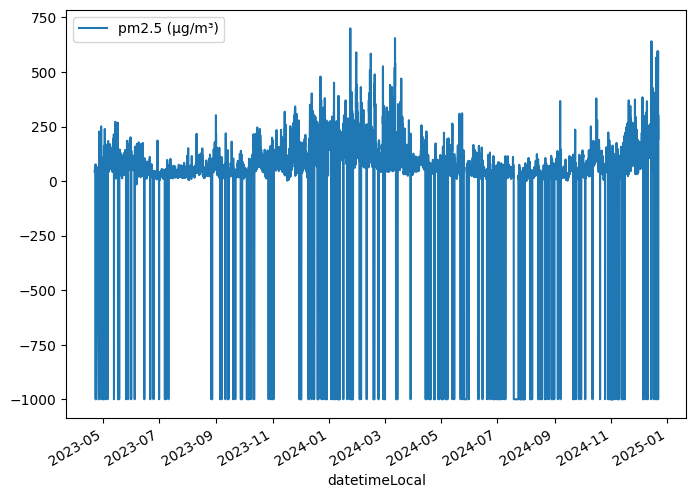

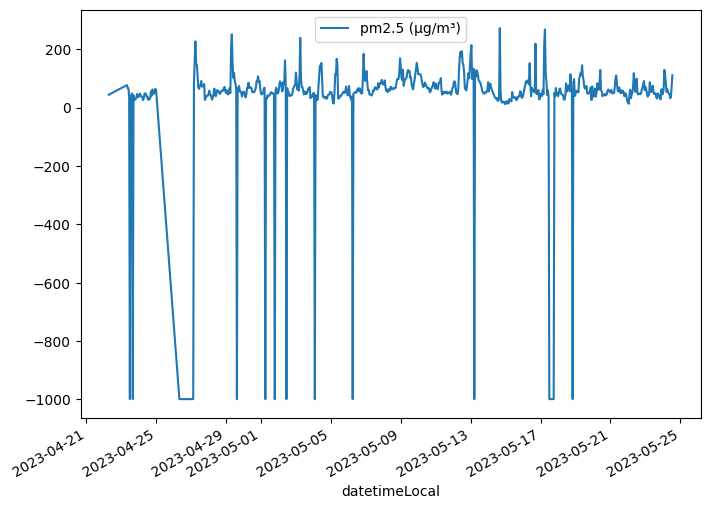

In [84]:
plot_cols = ['pm2.5 (µg/m³)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:720]
plot_features.index = date_time[:720]
_ = plot_features.plot(subplots=True)

In [85]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parameter,,,,,,,,
o3 (ppm),9353.0,-0.118239,0.345906,-0.999,0.001,0.009,0.024,0.147
pm2.5 (µg/m³),14540.0,46.722215,219.676855,-999.000,35.000,60.000,109.000,700.000


In [41]:
o3 = df['o3 (ppm)']
bad_o3 = o3 <= 0 
o3[bad_o3] = 0.001


In [86]:
pm25 = df['pm2.5 (µg/m³)']
bad_pm25 = pm25 <= 0.0
pm25[bad_pm25] = 0.0

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parameter,,,,,,,,
o3 (ppm),9353.0,-0.118239,0.345906,-0.999,0.001,0.009,0.024,0.147
pm2.5 (µg/m³),14540.0,84.580812,73.920945,0.000,35.000,60.000,109.000,700.000


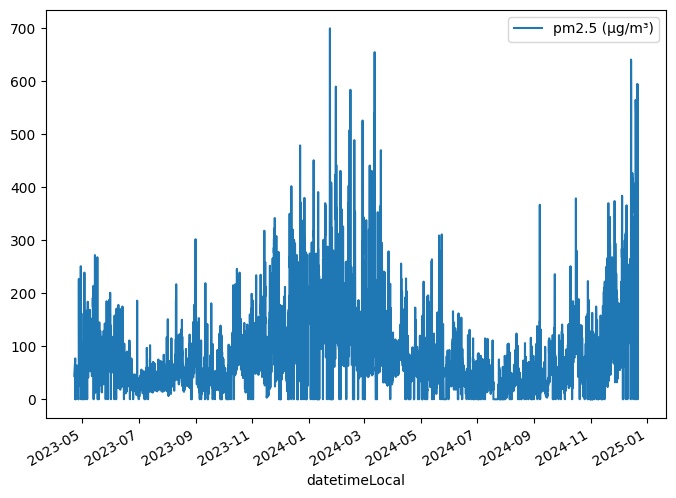

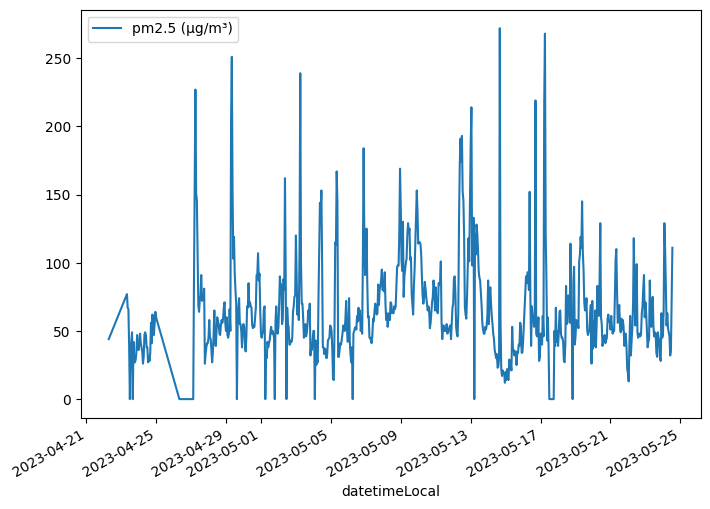

In [87]:
plot_cols = ['pm2.5 (µg/m³)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:720]
plot_features.index = date_time[:720]
_ = plot_features.plot(subplots=True)

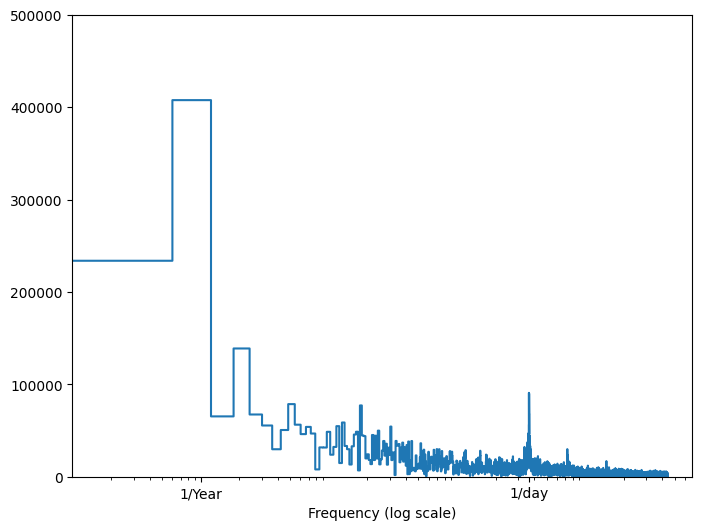

In [99]:
fft = tf.signal.rfft(df['pm2.5 (µg/m³)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['pm2.5 (µg/m³)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 500000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [100]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [101]:
num_features

2

In [102]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

/tmp/ipykernel_8546/3214313372.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


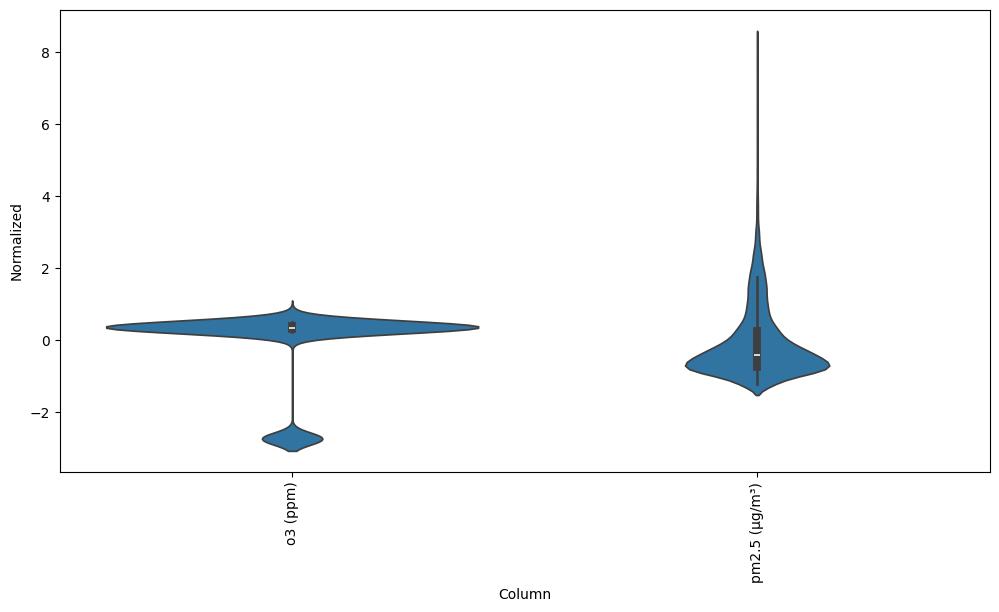

In [103]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [67]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[
            self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[
            self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [68]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['o3 (ppm)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['o3 (ppm)']

In [69]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['o3 (ppm)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['o3 (ppm)']